<a href="https://colab.research.google.com/github/nfk9564/Lab-0-Single-Pendelum/blob/main/Lab_0_Kebbeh_Ndeye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import csv
pressure = []
temperature = []
pressure_error = []
terror = []

with open('SampleData.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        temperature.append(float(row['Temperature (C)']))
        pressure.append(float(row['Pressure (lb/in^2)']))
        pressure_error.append(float(row['Estimated incertainty in pressure (lb/in^2)']))
        terror.append(float(row['Terror']))

FileNotFoundError: [Errno 2] No such file or directory: 'SampleData.csv'

# New Section

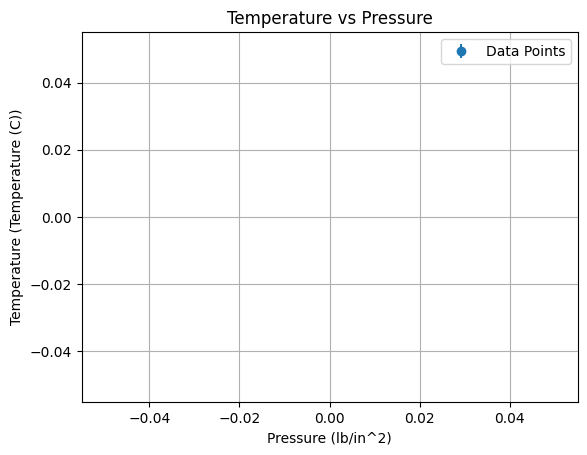

In [9]:
temperature = np.array(temperature)
pressure = np.array(pressure)
pressure_error = np.array(pressure_error)

plt.errorbar(pressure, temperature, yerr=pressure_error, fmt='o', capsize=3, label='Data Points')
plt.xlabel('Pressure (lb/in^2)')
plt.ylabel('Temperature (Temperature (C))')
plt.title('Temperature vs Pressure')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#2 Linear least-squares fit

N = len(pressure)

sum_x = 0
sum_y = 0
sum_x2 = 0
sum_xy = 0

for i in range(N):
    sum_x += pressure[i]
    sum_y += temperature[i]
    sum_x2 += pressure[i] ** 2
    sum_xy += pressure[i] * temperature[i]

m = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x ** 2)
b= (sum_y - m * sum_x) / N

fit_line = m * pressure + b

plt.errorbar(pressure, temperature, yerr=pressure_error, fmt='o', capsize=3, label='Data')
plt.plot(pressure, fit_line, 'r-', label='Least Squares Fit')
plt.xlabel('Pressure (lb/in²)')
plt.ylabel('Temperature (°C)')
plt.title('Linear Least Squares Fit')
plt.legend()
plt.grid()
plt.show()


print(f'Slope (no errors): {m}, Intercept (no errors): {b}')


In [ ]:
#3 Chi-Squared Fit

chi_squared = 0

fit_line = m * pressure + b

for i in range(N):
    chi_squared += ((temperature[i] - fit_line[i]) / pressure_error[i]) ** 2

plt.errorbar(pressure, temperature, yerr=pressure_error, fmt='o', capsize=3, label='Data')
plt.plot(pressure, fit_line, 'g--', label='Chi-Squared Fit')
plt.xlabel('Pressure (lb/in²)')
plt.ylabel('Temperature (°C)')
plt.title('Chi-Squared Linear Fit')
plt.legend()
plt.grid()
plt.show()

print(f'Chi-Squared: {chi_squared}')

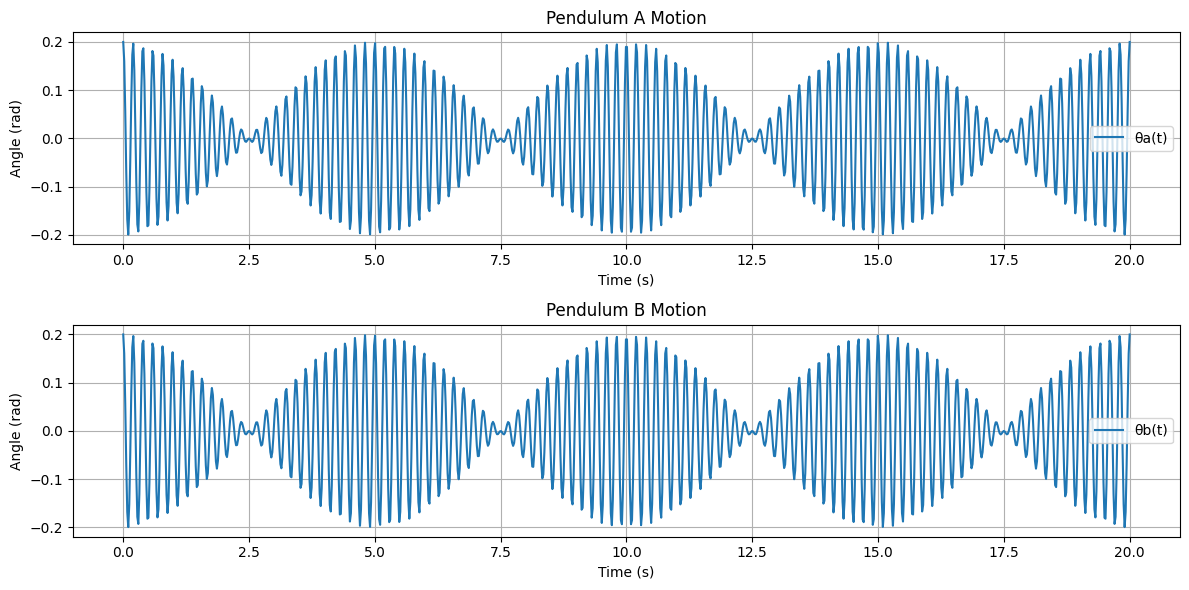

In [8]:
#Coupled Pendulums

A = 0.1
omega1 = 2 * np.pi * 5.0  #angular frequency 1
omega2 = 2 * np.pi * 5.2  #angular frequency 2
t = np.linspace(0, 20, 1000)  #time from 0 to 20 seconds

theta_a = A * np.cos(omega1 * t) + A * np.cos(omega2 * t)
theta_b = A * np.cos(omega1 * t) + A * np.cos(omega2 * t)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, theta_a, label='θa(t)')
plt.title('Pendulum A Motion')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, theta_b, label='θb(t)')
plt.title('Pendulum B Motion')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()